## Physics 191 A4 Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.special import comb
from scipy.special import factorial as fact
from scipy.stats import chisquare

### Part 1 Statistical Analysis of Coin Toss

Mean (x): 5.0
Standard Deviation (σ): 1.5231546211727818
Most Probable Macroscopic State: 5.0
Mean Theo(x): 5.0
Standard Deviation Theo(σ): 1.5811388300841898
Chi-Square Statistic: 0.11737904761904762
P-value: 0.9999999944741877


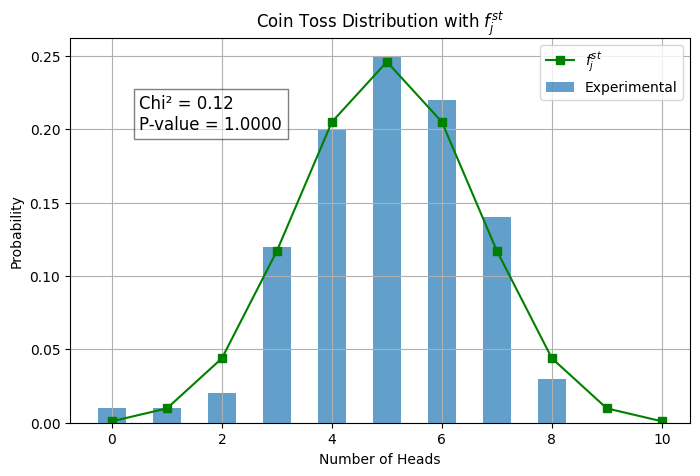

In [2]:
def analyze_coin_toss(data):
    num_heads = np.array(data)
    N = len(num_heads)

    xj, nj = np.unique(num_heads, return_counts=True)
    fj = nj / N
    
    mean = np.sum(fj*xj)
    sigma = np.sqrt(np.sum((xj**2)*fj) - mean**2)
    most_probable_state = xj[np.argmax(nj)]

    print(f"Mean (x): {mean}")
    print(f"Standard Deviation (σ): {sigma}")
    print(f"Most Probable Macroscopic State: {most_probable_state}")
    
    C = 10
    x = np.arange(0, C+1)
    t_m = 2**10
    f_j_st = fact(C)/(fact(C-x)*fact(x)*t_m)
    
    mean_theo = np.sum(f_j_st*x)
    sigma_theo = np.sqrt(np.sum((x**2)*f_j_st) - mean_theo**2)
    print(f"Mean Theo(x): {mean_theo}")
    print(f"Standard Deviation Theo(σ): {sigma_theo}")
    #Chisquare statistics
    observed_counts = fj.tolist()+[0]+[0]
    expected_counts = (f_j_st).tolist()
    
    chi2_stat, p_value = chisquare(observed_counts, expected_counts)
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    
    plt.figure(figsize=(8, 5))
    plt.bar(xj, fj, width=0.5, label='Experimental', alpha=0.7)
    plt.plot(x, f_j_st, 'gs-', label='$f_j^{st}$')
    plt.xlabel("Number of Heads")
    plt.ylabel("Probability")
    plt.title("Coin Toss Distribution with $f_j^{st}$")
    plt.legend()
    plt.grid()
    plt.text(0.5, max(fj) * 0.8, f"Chi² = {chi2_stat:.2f}\nP-value = {p_value:.4f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

    
data_file = "part1_data.txt"
coin_toss_data = np.loadtxt(data_file)


analyze_coin_toss(coin_toss_data)



### Part 2 Study of a Continuous Distribution

In [29]:
radial_data = [(1,2), (2,8), (3,7), (4,16), (5,18), 
               (6,16), (7,13), (8,11), (9,9)]


radii, counts = zip(*radial_data)
radii = np.array(radii)
counts = np.array(counts)


bins = np.arange(0, 11, 1)  
hist_counts, bin_edges = np.histogram(radii, bins=bins, weights=counts)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

N = sum(hist_counts)
delta_r = 1
f_r = hist_counts / (N * delta_r) 

r_mean = np.sum(bin_centers * f_r * delta_r)
sigma_r = np.sqrt(np.sum((bin_centers - r_mean) ** 2 * f_r * delta_r))

print(f"Bin edges: {bin_edges}")
print(f"Mean radius: {r_mean:.2f}")
print(f"Standard deviation: {sigma_r:.2f}")

# Theoretical distribution 
R = np.sqrt(2 / np.pi) * r_mean
r_theory = np.linspace(0, 10, 100)
f_theory = (r_theory / R**2) * np.exp(-r_theory**2 / (2 * R**2))
# print(f_theory)
#Chisquare statistics
r_exp = np.linspace(0, 10, len(f_r))
# print(f_r)
# print(((r_exp / R**2) * np.exp(-r_exp**2 / (2 * R**2))))
observed_counts = f_r * (f_r.sum() / f_r.sum())
expected_counts = ((r_exp / R**2) * np.exp(-r_exp**2 / (2 * R**2)))
print(observed_counts)
print(expected_counts)
chi2_stat, p_value = chisquare(observed_counts, expected_counts)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 5))
plt.bar(bin_centers, f_r, width=delta_r, label='Experimental', alpha=0.7, align='center')
plt.plot(r_theory, f_theory, 'r-', label='Theoretical')
plt.xlabel("Radius [cm]")
plt.ylabel("Normalized Frequency")
plt.title("Radial Distribution")
plt.legend()
plt.grid()

plt.text(0.70, 0.75, f'Mean Radius: {r_mean:.2f}', transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()


Bin edges: [ 0  1  2  3  4  5  6  7  8  9 10]
Mean radius: 5.99
Standard deviation: 2.09
[0.   0.02 0.08 0.07 0.16 0.18 0.16 0.13 0.11 0.09]
[0.         0.04734644 0.08731886 0.11442403 0.12627025 0.12376086
 0.11032247 0.09058105 0.06902128 0.04904745]


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.22235539638132265

#### Synthetic Data

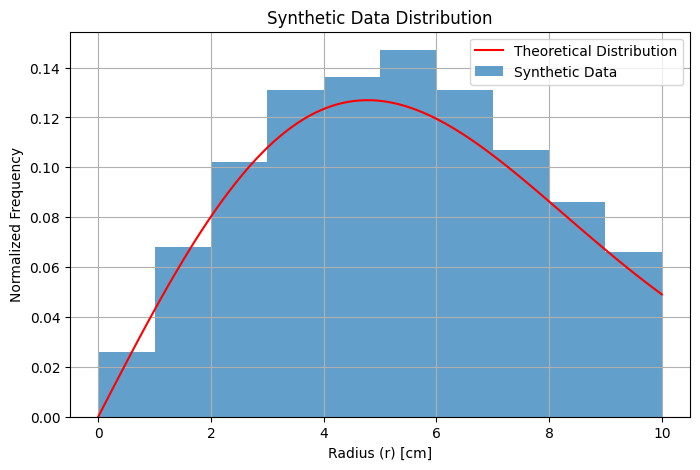

In [18]:
R = np.sqrt(2 / np.pi)*5.99  # From the previous analysis
N = 1000
np.random.seed(9)

def theoretical_distribution(r, R):
    return (r / R**2) * np.exp(-r**2 / (2 * R**2))

def sample_from_distribution(R, N):
    r_max = 10  # Reasonable cutoff
    r_samples = []
    while len(r_samples) < N:
        r_candidate = np.random.uniform(0, r_max)
        prob = theoretical_distribution(r_candidate, R)
        if np.random.uniform(0, max(prob, 1)) < prob:
            r_samples.append(r_candidate)
    return np.array(r_samples)

# Generate synthetic data
synthetic_data = sample_from_distribution(R, N)
bins = np.arange(0, 10 + 1, 1)  

hist_counts, bin_edges = np.histogram(synthetic_data, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 

plt.figure(figsize=(8, 5))
plt.bar(bin_centers, hist_counts, width=1, alpha=0.7, align='center', label='Synthetic Data')

r_fit = np.linspace(0, 10, 100)
f_fit = theoretical_distribution(r_fit, R)
plt.plot(r_fit, f_fit, 'r-', label='Theoretical Distribution')
plt.xlabel("Radius (r) [cm]")
plt.ylabel("Normalized Frequency")
plt.title("Synthetic Data Distribution")
plt.legend()
plt.grid()
plt.show()


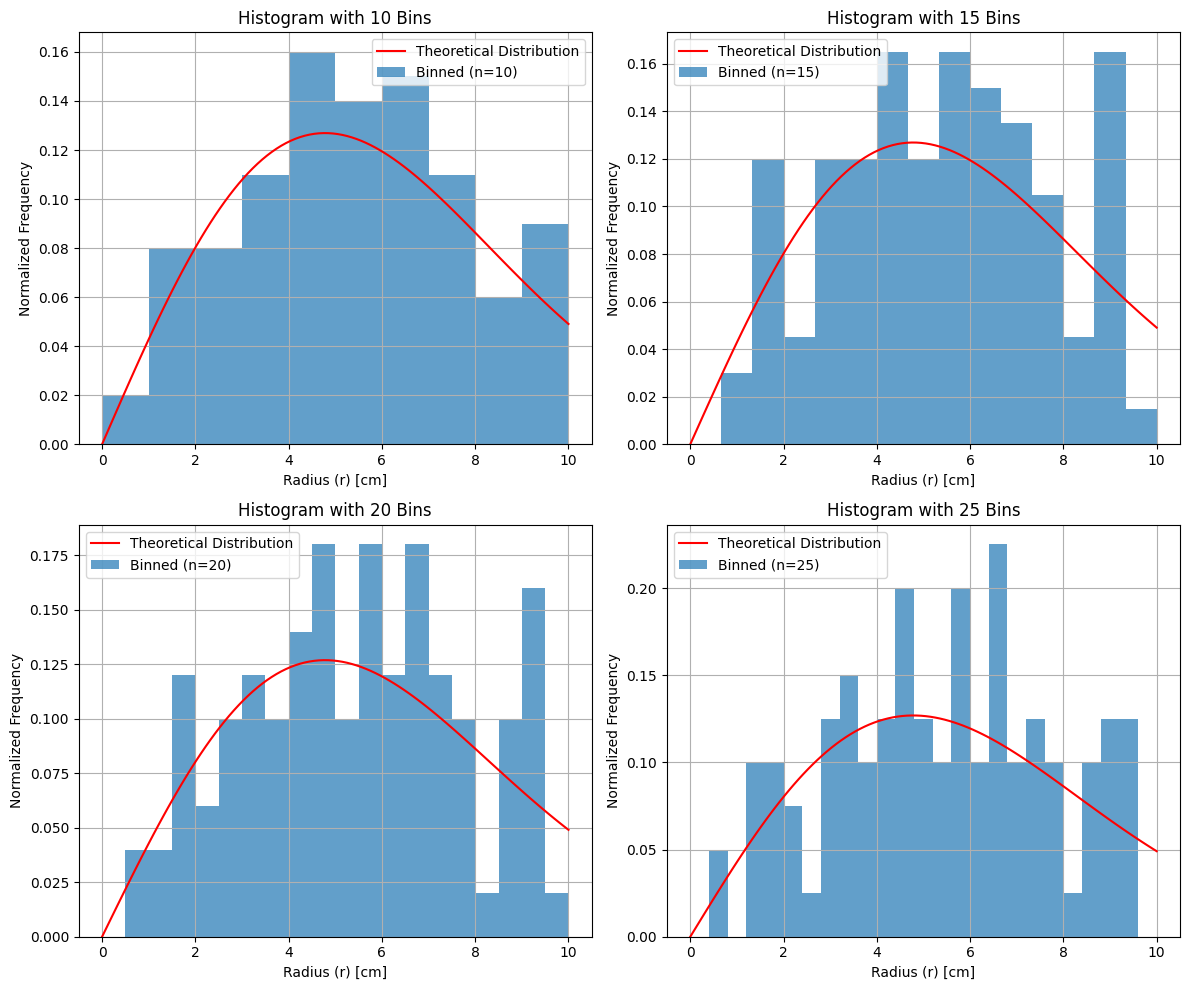

In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(9)
R = np.sqrt(2 / np.pi)*5.99
N = 100
bin_counts = [10, 15, 20, 25] 

def theoretical_distribution(r, R):
    return (r / R**2) * np.exp(-r**2 / (2 * R**2))

def sample_from_distribution(R, N):
    r_max = 10 
    r_samples = []
    while len(r_samples) < N:
        r_candidate = np.random.uniform(0, r_max)
        prob = theoretical_distribution(r_candidate, R)
        if np.random.uniform(0, max(prob, 1)) < prob:
            r_samples.append(r_candidate)
    return np.array(r_samples)

# Generate synthetic data
synthetic_data = sample_from_distribution(R, N)

# Create subplots for different binnings
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, bins in zip(axes.flatten(), bin_counts):
    bin_edges = np.linspace(0, 10, bins + 1)

    hist_counts, _ = np.histogram(synthetic_data, bins=bin_edges, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  

    ax.bar(bin_centers, hist_counts, width=(bin_edges[1] - bin_edges[0]), alpha=0.7, align='center', label=f'Binned (n={bins})')

    r_fit = np.linspace(0, 10, 100)
    f_fit = theoretical_distribution(r_fit, R)
#     print(f_fit)
    ax.plot(r_fit, f_fit, 'r-', label='Theoretical Distribution')

    ax.set_xlabel("Radius (r) [cm]")
    ax.set_ylabel("Normalized Frequency")
    ax.set_title(f"Histogram with {bins} Bins")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()
